In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import linear_model, LinearRegression, Ridge, lasso, GridSearchCV from sklearn
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet

from sklearn.model_selection import GridSearchCV
# import os
import os
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
cars = pd.read_csv(r'CarPrice_Assignment.csv')
cars.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
143,144,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,...,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960.0
24,25,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0


In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
a=[j for i,j in zip(range(len(cars.columns)),cars.columns) if cars.nunique()[i]<10]
a,cars.nunique()

(['symboling',
  'fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem'],
 car_ID              205
 symboling             6
 CarName             147
 fueltype              2
 aspiration            2
 doornumber            2
 carbody               5
 drivewheel            3
 enginelocation        2
 wheelbase            53
 carlength            75
 carwidth             44
 carheight            49
 curbweight          171
 enginetype            7
 cylindernumber        7
 enginesize           44
 fuelsystem            8
 boreratio            38
 stroke               37
 compressionratio     32
 horsepower           59
 peakrpm              23
 citympg              29
 highwaympg           30
 price               189
 dtype: int64)

In [23]:

cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [24]:
cars.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [25]:
cont= [i for i in cars.columns if i not in a]
cont

['car_ID',
 'CarName',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

<Figure size 640x480 with 0 Axes>

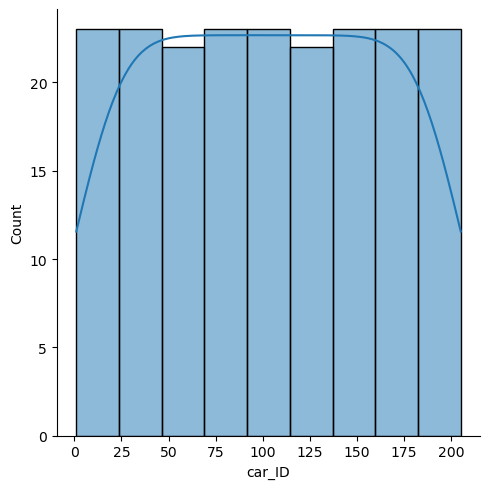

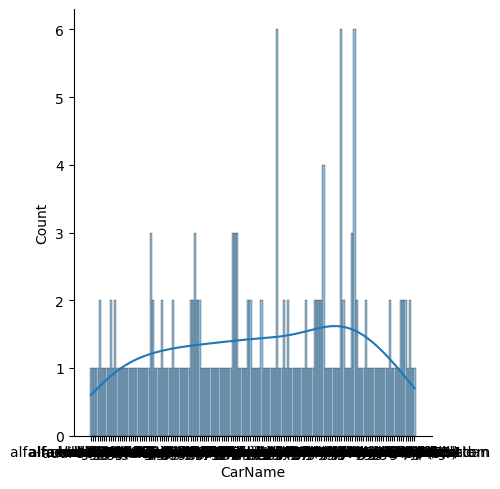

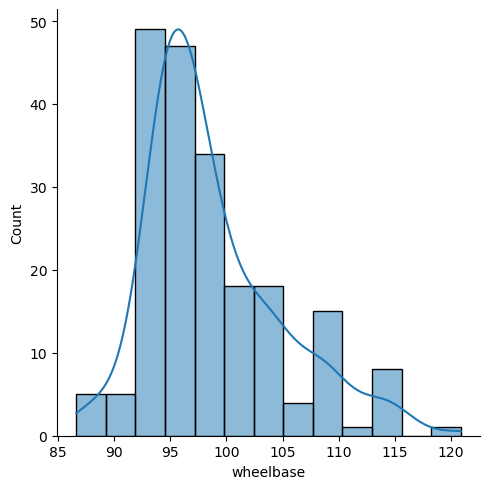

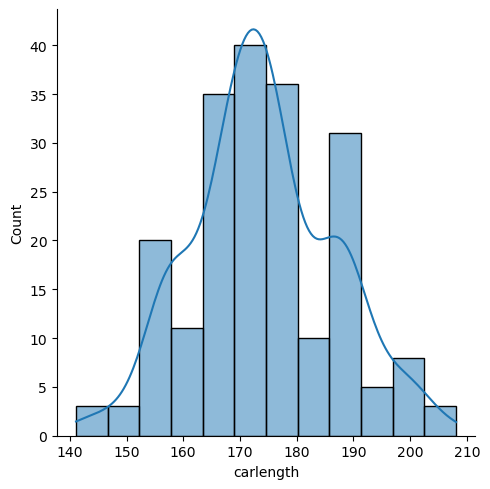

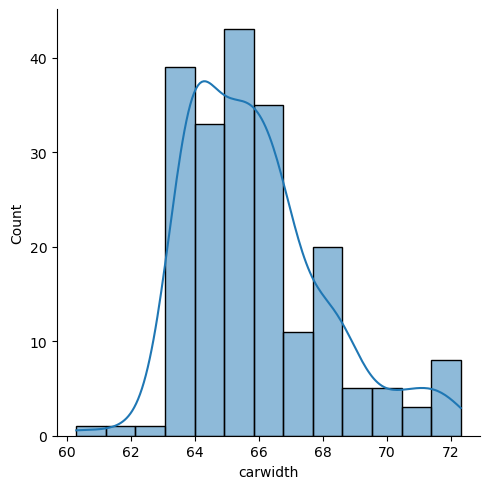

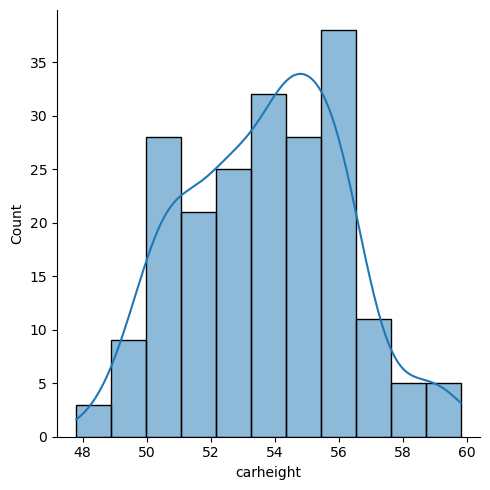

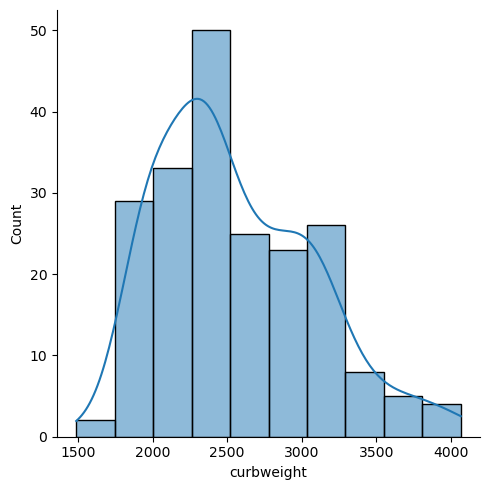

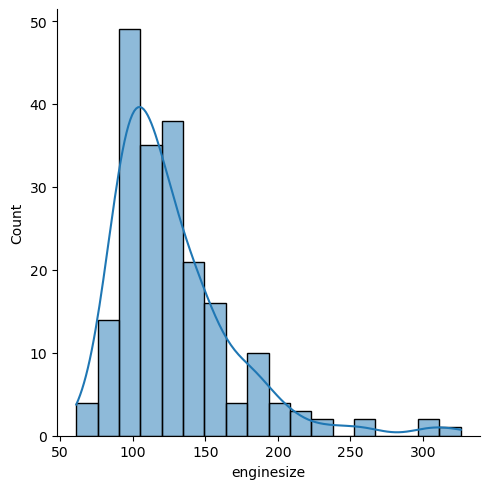

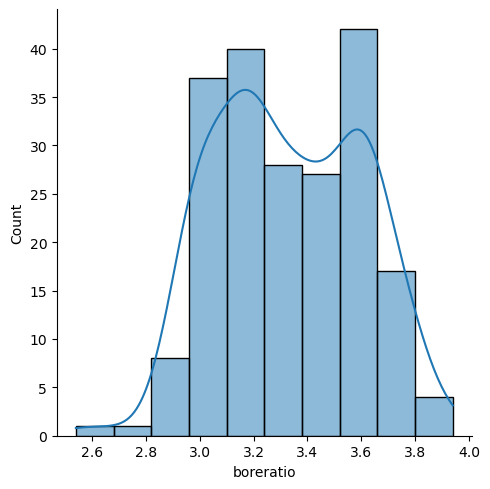

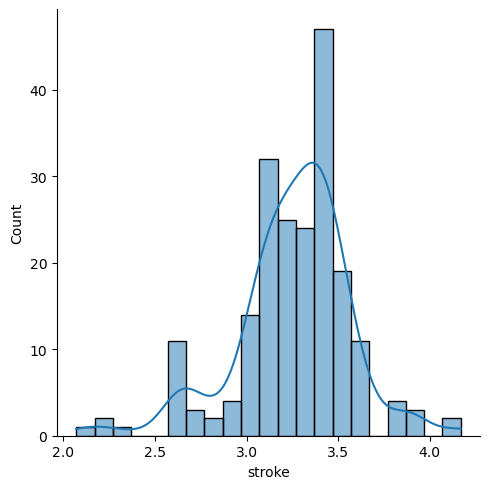

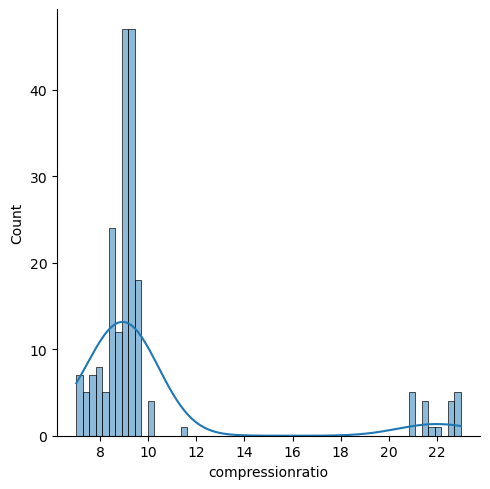

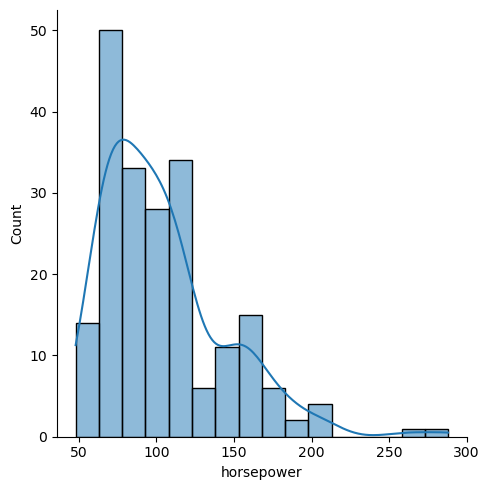

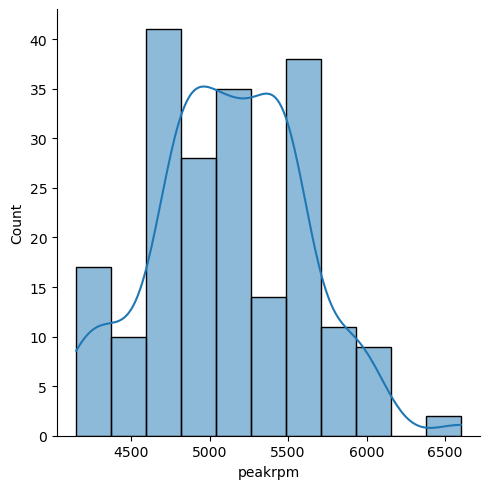

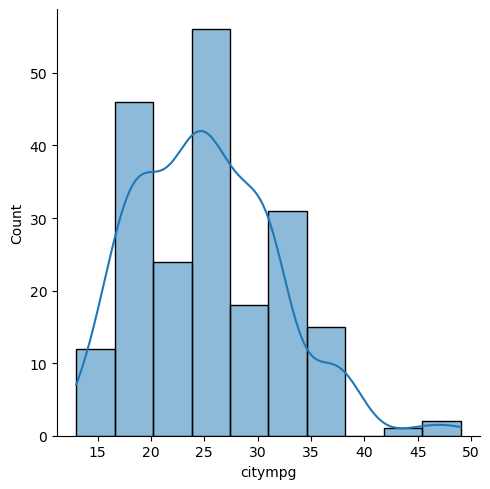

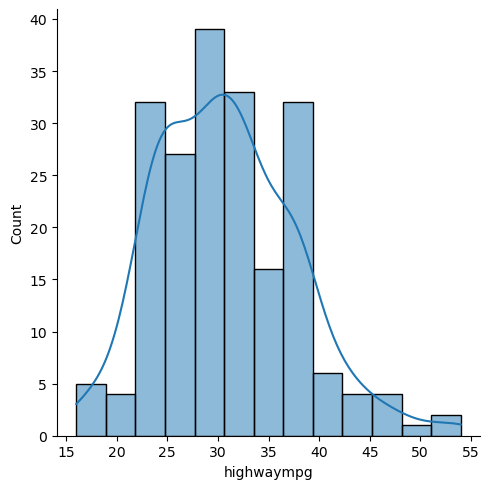

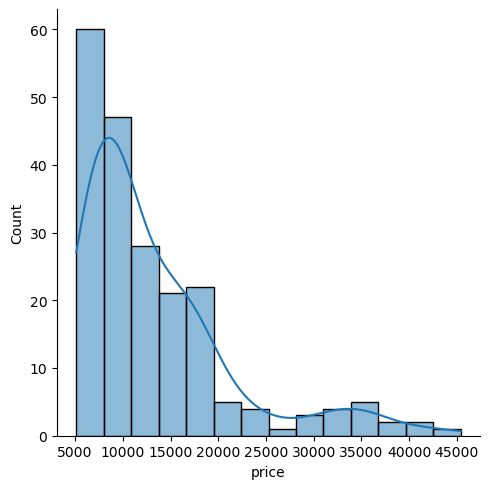

In [26]:
for i,j in enumerate(cont):
    plt.figure(i)
    sns.displot(x=j,data=cars,kde=True)

In [27]:
cars[cont].skew()

car_ID              0.000000
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

* wheelbase , EngineSize,carwidth,compressionratio,horsepower, price all these are RIght Skewed and postively skewed
* stroke is one and only negatively skewed

In [39]:
cars[cont]

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [42]:
cars.loc[:,'carwidth']

0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: carwidth, Length: 205, dtype: float64

TypeError: Horizontal orientation requires numeric `x` variable.

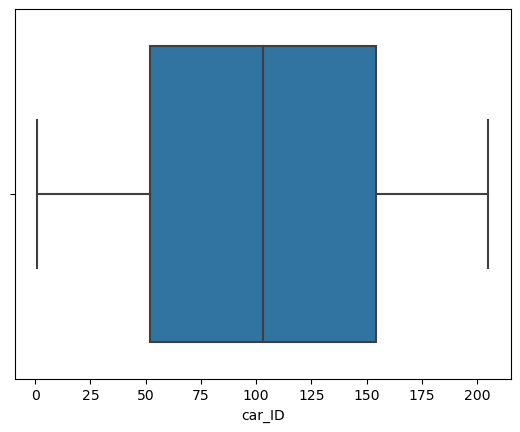

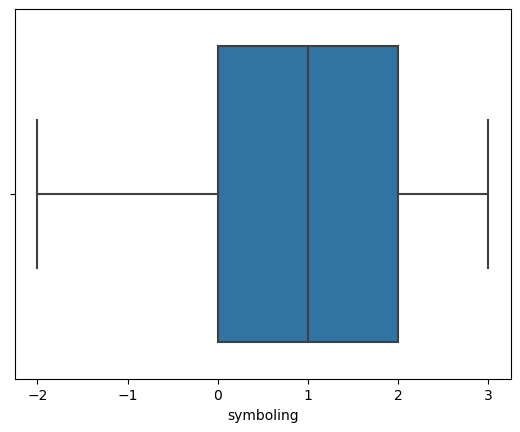

<Figure size 640x480 with 0 Axes>

In [47]:
for i in cars:
    plt.figure(i)
    sns.boxplot(data=cars,x=i)

<AxesSubplot:xlabel='carwidth'>

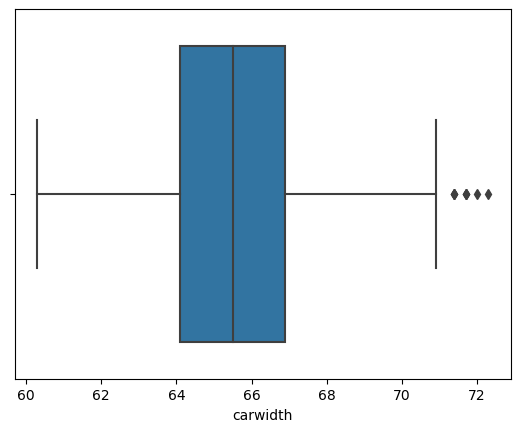

In [43]:
sns.boxplot(x=cars['carwidth'])

<AxesSubplot:xlabel='carheight'>

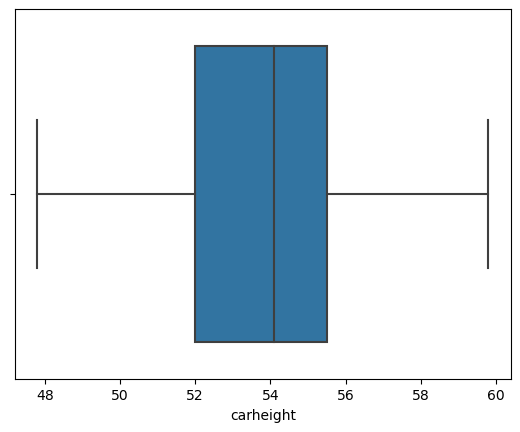

In [48]:
sns.boxplot(x=cars['carheight'])

TypeError: Horizontal orientation requires numeric `x` variable.

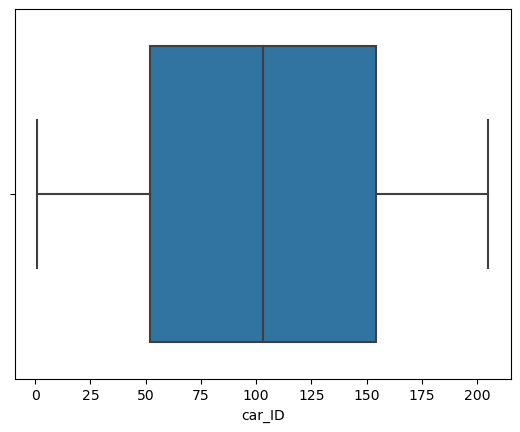

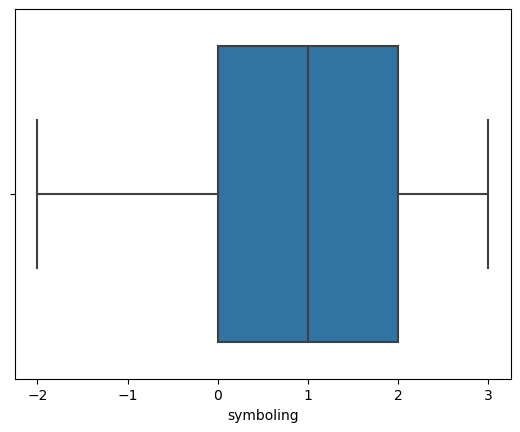

<Figure size 640x480 with 0 Axes>

In [44]:
for i,j in enumerate(cars.columns):
    plt.figure(i)
    sns.boxplot(x=j,data=cars)

* Carwidth,Wheelbase,Carlength,price, highwaympg, citympg,horsepower, stroke,enginesize are having outliers


In [49]:
cont=['Carwidth','Wheelbase','Carlength','price', 'highwaympg', 'citympg','horsepower', 'stroke','enginesize']

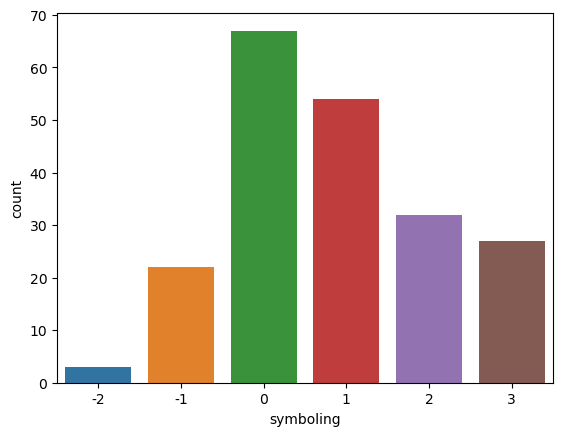

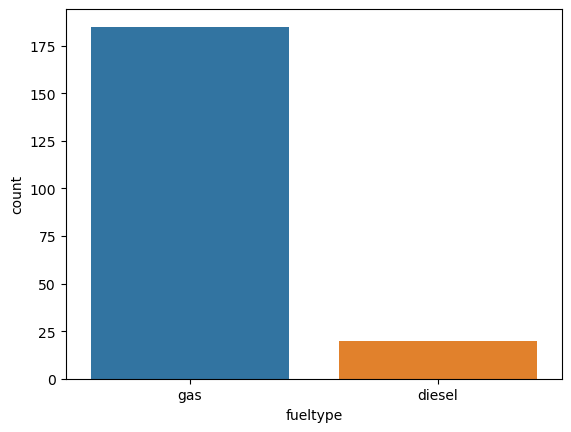

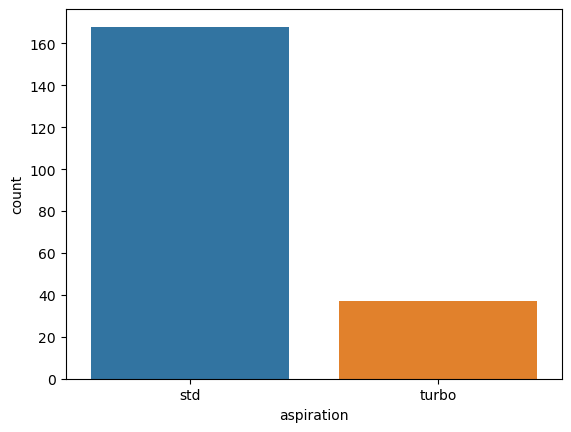

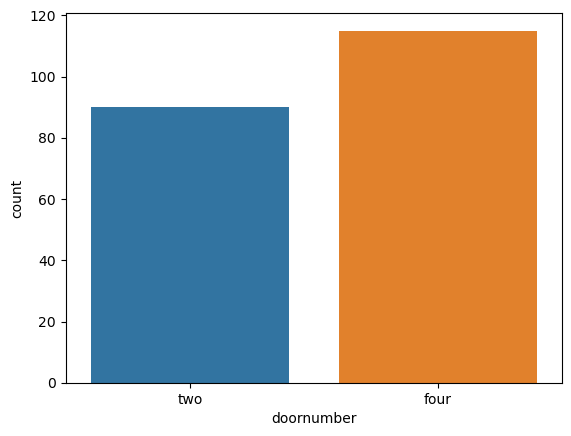

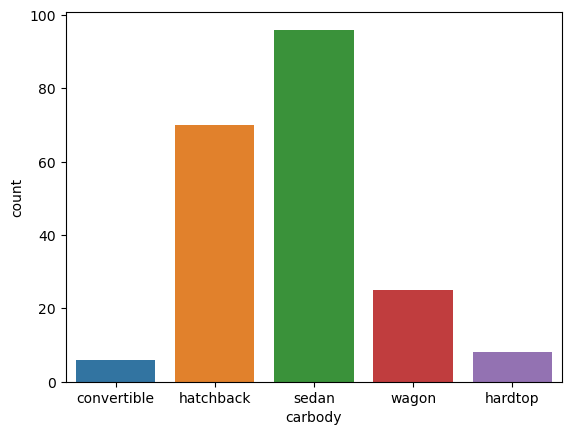

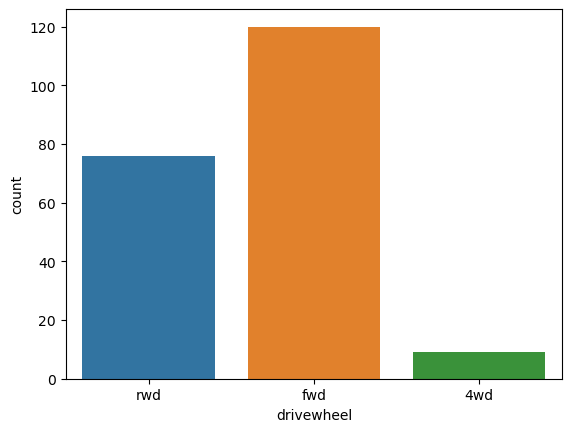

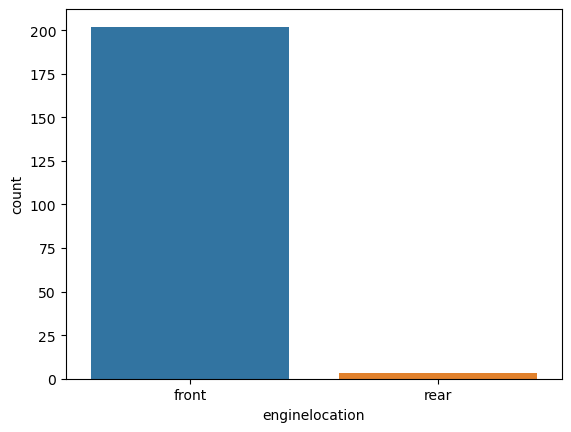

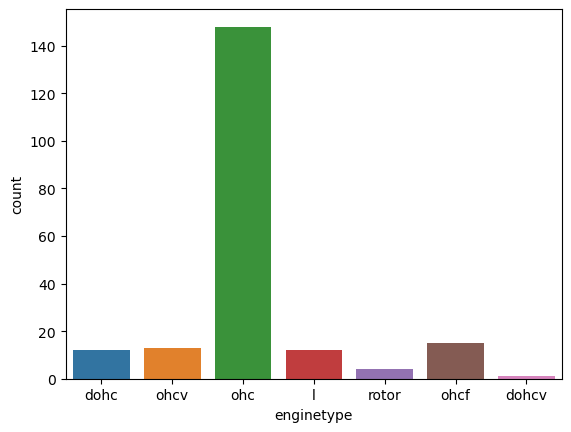

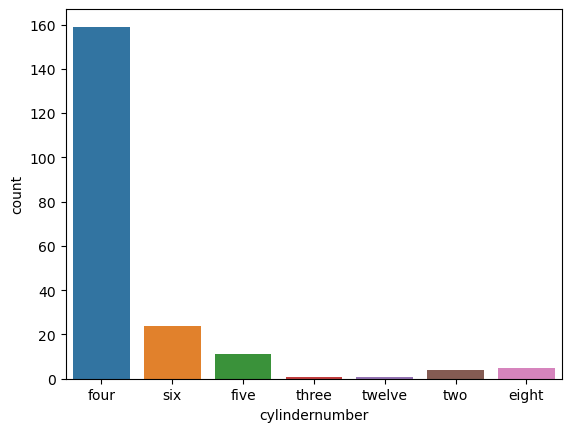

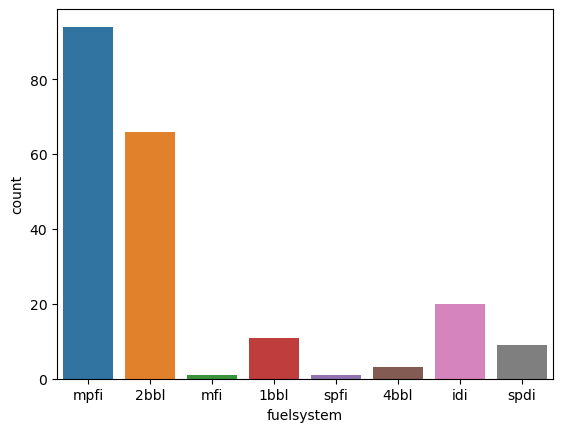

In [50]:
for i,j in enumerate(a):
    plt.figure(i)
    sns.countplot(x=j,data=cars)

In [ ]:
['Carwidth', 'Wheelbase', 'Carlength']

In [57]:
cars['curbweight']

0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curbweight, Length: 205, dtype: int64

In [51]:
sns.pairplot(cars[cont])

KeyError: "['Carwidth', 'Wheelbase', 'Carlength'] not in index"

In [52]:
sns.clustermap(cars[cont].corr(),annot=True)

KeyError: "['Carwidth', 'Wheelbase', 'Carlength'] not in index"

In [58]:
plt.figure(figsize=(16,8))
sns.heatmap(cars[cont].corr(),annot=True)

KeyError: "['Carwidth', 'Wheelbase', 'Carlength'] not in index"

<Figure size 1600x800 with 0 Axes>

In [13]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [59]:
cars.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
169,170,2,toyota starlet,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989.0
53,54,1,mazda rx-4,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695.0
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018.0
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0


In [60]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [61]:
cars.duplicated().sum()

0

In [62]:
cars[a]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,-1,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,-1,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,-1,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [63]:
cars[a].nunique()

symboling         6
fueltype          2
aspiration        2
doornumber        2
carbody           5
drivewheel        3
enginelocation    2
enginetype        7
cylindernumber    7
fuelsystem        8
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
le= LabelEncoder()
cars['fueltype']=le.fit_transform(cars[['fueltype']])

In [65]:
cars['aspiration']=le.fit_transform(cars[['aspiration']])
cars['doornumber'] = le.fit_transform(cars[['doornumber']])
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [66]:
k=pd.get_dummies(cars['symboling'],prefix='symboling',drop_first=True)
cars=pd.concat([cars,k],axis=1)
cars.drop('symboling',axis=1,inplace=True)

In [67]:
cars

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,alfa-romero giulia,1,0,1,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,0,0,0,0,1
1,2,alfa-romero stelvio,1,0,1,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,0,0,0,0,1
2,3,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,0,0,1,0,0
3,4,audi 100 ls,1,0,0,sedan,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,0,0,0,1,0
4,5,audi 100ls,1,0,0,sedan,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),1,0,0,sedan,rwd,front,109.1,188.8,...,114,5400,23,28,16845.0,1,0,0,0,0
201,202,volvo 144ea,1,1,0,sedan,rwd,front,109.1,188.8,...,160,5300,19,25,19045.0,1,0,0,0,0
202,203,volvo 244dl,1,0,0,sedan,rwd,front,109.1,188.8,...,134,5500,18,23,21485.0,1,0,0,0,0
203,204,volvo 246,0,1,0,sedan,rwd,front,109.1,188.8,...,106,4800,26,27,22470.0,1,0,0,0,0


In [68]:
k=pd.get_dummies(cars['carbody'],prefix='carbody' ,drop_first=True)
cars=pd.concat([cars,k],axis=1)
cars.drop('carbody',axis=1,inplace=True)
cars

,car_ID,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,alfa-romero giulia,1,0,1,rwd,front,88.6,168.8,64.1,...,13495.0,0,0,0,0,1,0,0,0,0
1,2,alfa-romero stelvio,1,0,1,rwd,front,88.6,168.8,64.1,...,16500.0,0,0,0,0,1,0,0,0,0
2,3,alfa-romero Quadrifoglio,1,0,1,rwd,front,94.5,171.2,65.5,...,16500.0,0,0,1,0,0,0,1,0,0
3,4,audi 100 ls,1,0,0,fwd,front,99.8,176.6,66.2,...,13950.0,0,0,0,1,0,0,0,1,0
4,5,audi 100ls,1,0,0,4wd,front,99.4,176.6,66.4,...,17450.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),1,0,0,rwd,front,109.1,188.8,68.9,...,16845.0,1,0,0,0,0,0,0,1,0
201,202,volvo 144ea,1,1,0,rwd,front,109.1,188.8,68.8,...,19045.0,1,0,0,0,0,0,0,1,0
202,203,volvo 244dl,1,0,0,rwd,front,109.1,188.8,68.9,...,21485.0,1,0,0,0,0,0,0,1,0
203,204,volvo 246,0,1,0,rwd,front,109.1,188.8,68.9,...,22470.0,1,0,0,0,0,0,0,1,0


In [69]:
k=pd.get_dummies(cars['drivewheel'],prefix='drivewheel',drop_first=True)
cars=pd.concat([cars,k],axis=1)
cars.drop('drivewheel',axis=1,inplace=True)
cars

,car_ID,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,1,alfa-romero giulia,1,0,1,front,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,1
1,2,alfa-romero stelvio,1,0,1,front,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,1
2,3,alfa-romero Quadrifoglio,1,0,1,front,94.5,171.2,65.5,52.4,...,0,1,0,0,0,1,0,0,0,1
3,4,audi 100 ls,1,0,0,front,99.8,176.6,66.2,54.3,...,0,0,1,0,0,0,1,0,1,0
4,5,audi 100ls,1,0,0,front,99.4,176.6,66.4,54.3,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),1,0,0,front,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,1,0,0,1
201,202,volvo 144ea,1,1,0,front,109.1,188.8,68.8,55.5,...,0,0,0,0,0,0,1,0,0,1
202,203,volvo 244dl,1,0,0,front,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,1,0,0,1
203,204,volvo 246,0,1,0,front,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,1,0,0,1


In [70]:
k=pd.get_dummies(cars['enginelocation'],prefix='enginelocation',drop_first=True)
cars=pd.concat([cars,k],axis=1)
cars.drop('enginelocation',axis=1,inplace=True)
cars

,car_ID,CarName,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,...,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,1,alfa-romero giulia,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,0
1,2,alfa-romero stelvio,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,0
2,3,alfa-romero Quadrifoglio,1,0,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,0
3,4,audi 100 ls,1,0,0,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,1,0,1,0,0
4,5,audi 100ls,1,0,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),1,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,0,0,0,1,0,0,1,0
201,202,volvo 144ea,1,1,0,109.1,188.8,68.8,55.5,3049,...,0,0,0,0,0,1,0,0,1,0
202,203,volvo 244dl,1,0,0,109.1,188.8,68.9,55.5,3012,...,0,0,0,0,0,1,0,0,1,0
203,204,volvo 246,0,1,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,0,1,0,0,1,0


In [71]:
k=pd.get_dummies(cars['enginetype'],prefix='enginetype',drop_first=True)
cars=pd.concat([cars,k],axis=1)
cars.drop('enginetype',axis=1,inplace=True)
cars

,car_ID,CarName,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,alfa-romero giulia,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,0,0
1,2,alfa-romero stelvio,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,0,0
2,3,alfa-romero Quadrifoglio,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,0,0,1,0
3,4,audi 100 ls,1,0,0,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,1,0,0,0
4,5,audi 100ls,1,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),1,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,1,0,0,0,1,0,0,0
201,202,volvo 144ea,1,1,0,109.1,188.8,68.8,55.5,3049,...,0,0,1,0,0,0,1,0,0,0
202,203,volvo 244dl,1,0,0,109.1,188.8,68.9,55.5,3012,...,0,0,1,0,0,0,0,0,1,0
203,204,volvo 246,0,1,0,109.1,188.8,68.9,55.5,3217,...,0,0,1,0,0,0,1,0,0,0


In [72]:
k=pd.get_dummies(cars['cylindernumber'],prefix='cylindernumber',drop_first=True)
cars=pd.concat([cars,k],axis=1)
cars.drop('cylindernumber',axis=1,inplace=True)
cars

,car_ID,CarName,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,alfa-romero giulia,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
1,2,alfa-romero stelvio,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
2,3,alfa-romero Quadrifoglio,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,1,0,0,0
3,4,audi 100 ls,1,0,0,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0
4,5,audi 100ls,1,0,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),1,0,0,109.1,188.8,68.9,55.5,2952,...,1,0,0,0,0,1,0,0,0,0
201,202,volvo 144ea,1,1,0,109.1,188.8,68.8,55.5,3049,...,1,0,0,0,0,1,0,0,0,0
202,203,volvo 244dl,1,0,0,109.1,188.8,68.9,55.5,3012,...,0,0,1,0,0,0,1,0,0,0
203,204,volvo 246,0,1,0,109.1,188.8,68.9,55.5,3217,...,1,0,0,0,0,0,1,0,0,0


In [73]:
k=pd.get_dummies(cars['fuelsystem'],prefix='fuelsystem',drop_first=True)
cars=pd.concat([cars,k],axis=1)
cars.drop('fuelsystem',axis=1,inplace=True)
cars

,car_ID,CarName,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,alfa-romero giulia,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,2,alfa-romero stelvio,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,3,alfa-romero Quadrifoglio,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,4,audi 100 ls,1,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,5,audi 100ls,1,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),1,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,0,0,0,0,0,1,0,0
201,202,volvo 144ea,1,1,0,109.1,188.8,68.8,55.5,3049,...,0,0,0,0,0,0,0,1,0,0
202,203,volvo 244dl,1,0,0,109.1,188.8,68.9,55.5,3012,...,0,0,0,0,0,0,0,1,0,0
203,204,volvo 246,0,1,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,0,1,0,0,0,0


In [74]:
cars.drop(['aspiration','doornumber','fueltype'],axis=1,inplace=True)

In [75]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   CarName                205 non-null    object 
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  price 

In [76]:
cars['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [77]:
k=cars['CarName'].str.split(expand=True)
cars = pd.concat([cars,k[0]],axis=1)
cars

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,0
0,1,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,alfa-romero
1,2,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,alfa-romero
2,3,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,1,0,0,alfa-romero
3,4,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,audi
4,5,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,1,0,0,volvo
201,202,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,1,0,0,volvo
202,203,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,1,0,0,volvo
203,204,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,1,0,0,0,0,volvo


In [78]:
cars.rename(columns={0:'company_name'},inplace=True)
cars

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_name
0,1,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,alfa-romero
1,2,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,alfa-romero
2,3,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,1,0,0,alfa-romero
3,4,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,audi
4,5,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,1,0,0,volvo
201,202,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,1,0,0,volvo
202,203,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,1,0,0,volvo
203,204,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,1,0,0,0,0,volvo


In [79]:
cars['company_name'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company_name, dtype: int64

In [80]:
cars['company_name'].replace({'vw':'volkswagen','Nissan':'nissan','vokswagen':'volkswagen','porcshce':'porsche',
                              'toyouta':'toyota','isuzu':'suzuki'},inplace=True)
cars['company_name'].value_counts()

toyota         32
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
suzuki          4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
mercury         1
Name: company_name, dtype: int64

In [81]:
k=(cars['company_name'].value_counts())
(k<7).index

Index(['toyota', 'nissan', 'mazda', 'honda', 'mitsubishi', 'subaru',
       'volkswagen', 'peugeot', 'volvo', 'dodge', 'buick', 'bmw', 'audi',
       'plymouth', 'saab', 'porsche', 'suzuki', 'alfa-romero', 'jaguar',
       'chevrolet', 'renault', 'maxda', 'mercury'],
      dtype='object')

In [82]:
l1=k[k<7].index

In [83]:
cars['company_name'].replace(l1,'others',inplace=True)
cars['company_name'].value_counts()

toyota        32
others        29
nissan        18
mazda         15
honda         13
mitsubishi    13
subaru        12
volkswagen    12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
Name: company_name, dtype: int64

In [84]:
k=pd.get_dummies(cars['company_name'],drop_first=True)
k

,bmw,buick,dodge,honda,mazda,mitsubishi,nissan,others,peugeot,plymouth,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [85]:
cars = pd.concat([cars,k],axis=1)
cars

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,mazda,mitsubishi,nissan,others,peugeot,plymouth,subaru,toyota,volkswagen,volvo
0,1,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,0,0,0,0
1,2,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,0,0,0,0
2,3,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,1,0,0,0,0,0,0
3,4,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,5,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
201,202,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
202,203,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,0,0,1
203,204,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,0,0,0,0,1


In [86]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   CarName                205 non-null    object 
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  price 

In [87]:
X= cars.drop(['price','CarName','company_name','car_ID'],axis=1)
y=cars['price']
import statsmodels.api as sm

In [88]:
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'bmw', 'buick', 'dodge', 'honda',
       'mazda', 'mitsubishi', 'nissan', 'others', 'peugeot', 'plymouth',
       'subaru', 'toyota', 'volkswagen', 'volv

In [89]:
X_new = sm.add_constant(X)
model = sm.OLS(y,X_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     67.12
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           4.12e-82
Time:                        15:48:51   Log-Likelihood:                -1799.4
No. Observations:                 205   AIC:                             3711.
Df Residuals:                     149   BIC:                             3897.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.101e+

In [90]:
df = cars.drop(['volvo','volkswagen','others','nissan','mazda','honda','buick','fuelsystem_spfi','fuelsystem_spdi','fuelsystem_mpfi','fuelsystem_mfi',
                'fuelsystem_idi','fuelsystem_2bbl','fuelsystem_4bbl','cylindernumber_two','cylindernumber_twelve',
               'cylindernumber_three','cylindernumber_six','cylindernumber_four','cylindernumber_five','enginetype_rotor',
               'enginetype_ohc','enginetype_l','enginetype_dohcv','drivewheel_rwd','drivewheel_fwd','carbody_sedan',
                'carbody_hardtop','symboling_3','symboling_2','symboling_1','symboling_0','symboling_-1','citympg','highwaympg',
                'compressionratio','carheight','CarName','company_name','car_ID'],axis=1)
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,price,...,enginelocation_rear,enginetype_ohcf,enginetype_ohcv,bmw,dodge,mitsubishi,peugeot,plymouth,subaru,toyota
0,88.6,168.8,64.1,2548,130,3.47,2.68,111,5000,13495.0,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,2.68,111,5000,16500.0,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,3.47,154,5000,16500.0,...,0,0,1,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,3.40,102,5500,13950.0,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,3.40,115,5500,17450.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,3.15,114,5400,16845.0,...,0,0,0,0,0,0,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,3.15,160,5300,19045.0,...,0,0,0,0,0,0,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,2.87,134,5500,21485.0,...,0,0,1,0,0,0,0,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,3.40,106,4800,22470.0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X1=df.drop('price',axis=1)
y1= df['price']
X1_new= sm.add_constant(X1)

In [92]:
model2 =sm.OLS(y1,X1_new).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     125.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           8.11e-96
Time:                        15:48:55   Log-Likelihood:                -1857.6
No. Observations:                 205   AIC:                             3757.
Df Residuals:                     184   BIC:                             3827.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -5.42e+04   1

* columns to dropped are
* 'volvo','volkswagen','others','nissan','mazda','honda','buick','fuelsystem_spfi','fuelsystem_spdi','fuelsystem_mpfi','fuelsystem_mfi',
                'fuelsystem_idi','fuelsystem_2bbl','fuelsystem_4bbl','cylindernumber_two','cylindernumber_twelve',
               'cylindernumber_three','cylindernumber_six','cylindernumber_four','cylindernumber_five','enginetype_rotor',
               'enginetype_ohc','enginetype_l','enginetype_dohcv','drivewheel_rwd','drivewheel_fwd','carbody_sedan',
                'carbody_hardtop','symboling_3','symboling_2','symboling_1','symboling_0','symboling_-1','citympg','highwaympg',
                'compressionratio','carheight'

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_sc(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['vif_scores'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    vif.sort_values(by='vif_scores',ascending=False,inplace=True)
    return vif

In [94]:
vif_sc(X)

,features,vif_scores
28,enginetype_ohcf,inf
36,cylindernumber_two,inf
26,enginetype_l,inf
30,enginetype_rotor,inf
24,enginelocation_rear,inf
52,peugeot,inf
34,cylindernumber_three,inf
54,subaru,inf
2,carwidth,7710.545921
0,wheelbase,4707.990278


In [95]:
X.drop(['subaru','cylindernumber_three','peugeot','enginelocation_rear','enginetype_l','enginetype_rotor','cylindernumber_two',
        'enginetype_ohcf'],axis=1,inplace=True)
vif_sc(X)

,features,vif_scores
2,carwidth,7098.477445
0,wheelbase,4312.938266
1,carlength,3572.579515
3,carheight,1895.930250
8,compressionratio,1306.857734
6,boreratio,973.475598
4,curbweight,770.403858
12,highwaympg,744.719305
11,citympg,612.751603
10,peakrpm,507.231017


In [96]:
X_new=sm.add_constant(X)
model3=sm.OLS(y,X_new).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     57.55
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           6.81e-78
Time:                        15:49:02   Log-Likelihood:                -1827.0
No. Observations:                 205   AIC:                             3756.
Df Residuals:                     154   BIC:                             3926.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.851e+

In [97]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split as tts

In [98]:
xtr,xt,ytr,yt = tts(X_new,y,test_size=0.2)

## Lasso(L1)

In [99]:
 # list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,19,18, 17,16,15,14,13,12,11,20,21,22,23,24,26,25, 50, 100, 500, 1000 ]}

gs = GridSearchCV(Lasso(),param_grid=params, return_train_score=True,cv=5,verbose=1,n_jobs=-1
                  ,scoring = 'neg_mean_squared_error')
gs.fit(xtr,ytr)
gs.best_params_

Fitting 5 folds for each of 43 candidates, totalling 215 fits


{'alpha': 20}

In [100]:
cv_res = pd.DataFrame(gs.cv_results_)
cv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065620,0.011693,0.006251,0.007656,0.0001,{'alpha': 0.0001},-1.769501e+07,-6.107931e+06,-1.091684e+07,-4.166681e+06,...,-8.905339e+06,4.944608e+06,40,-2.340395e+06,-2.488567e+06,-2.467391e+06,-2.818118e+06,-2.443945e+06,-2.511683e+06,161447.403257
1,0.065620,0.018220,0.006250,0.007654,0.001,{'alpha': 0.001},-1.769231e+07,-6.107768e+06,-1.091636e+07,-4.166549e+06,...,-8.904649e+06,4.943649e+06,39,-2.340396e+06,-2.488567e+06,-2.467391e+06,-2.818118e+06,-2.443946e+06,-2.511683e+06,161447.303647
2,0.065620,0.006249,0.006249,0.007654,0.01,{'alpha': 0.01},-1.766533e+07,-6.106136e+06,-1.091157e+07,-4.165235e+06,...,-8.897762e+06,4.934069e+06,38,-2.340402e+06,-2.488568e+06,-2.467394e+06,-2.818119e+06,-2.443951e+06,-2.511687e+06,161445.919902
3,0.065621,0.006249,0.006249,0.007654,0.05,{'alpha': 0.05},-1.754597e+07,-6.098932e+06,-1.089107e+07,-4.159463e+06,...,-8.867460e+06,4.891748e+06,37,-2.340485e+06,-2.488608e+06,-2.467454e+06,-2.818154e+06,-2.444022e+06,-2.511745e+06,161431.240630
4,0.065621,0.015308,0.006249,0.007654,0.1,{'alpha': 0.1},-1.742626e+07,-6.090009e+06,-1.086588e+07,-4.152402e+06,...,-8.835646e+06,4.849336e+06,36,-2.340668e+06,-2.488730e+06,-2.467629e+06,-2.818266e+06,-2.444225e+06,-2.511904e+06,161404.474969


In [82]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

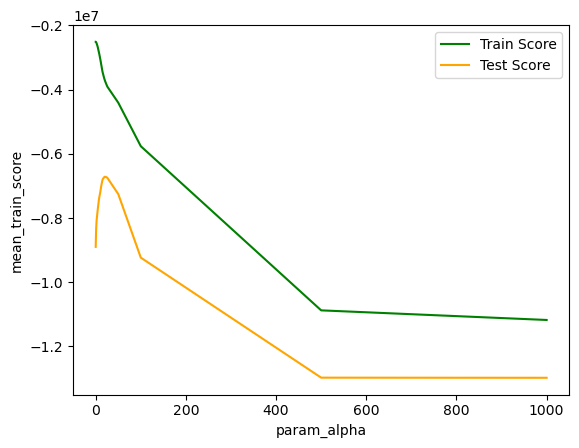

In [101]:
sns.lineplot(x='param_alpha',y='mean_train_score',data=cv_res,label='Train Score',color='green')
sns.lineplot(x='param_alpha',y='mean_test_score',data=cv_res,label='Test Score',color='orange')
plt.legend()

In [102]:
gs.best_params_

{'alpha': 20}

In [103]:
model_lasso = Lasso(alpha=50)
model_lasso.fit(xtr,ytr)
print('Train Score',model_lasso.score(xtr,ytr))
print('Test Score',model_lasso.score(xt,yt))
y_pred_lasso = model_lasso.predict(xt)

Train Score 0.9341231961095178
Test Score 0.816822222600799


## Ridge (L2)

In [104]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,19,18, 17,16,15,14,13,12,11,20,21,22,23,24,26,25, 50, 100, 500, 1000 ]}
gs1 =GridSearchCV(Ridge(),param_grid=params,cv=5,n_jobs=-1,verbose=1,scoring='neg_mean_squared_error',
                 return_train_score=True)
gs1.fit(xtr,ytr)
gs1.best_params_

Fitting 5 folds for each of 43 candidates, totalling 215 fits


{'alpha': 0.6}

In [105]:
cv_res_rg = pd.DataFrame(gs1.cv_results_)
cv_res_rg.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053108,0.021184,0.012500,0.011693,0.0001,{'alpha': 0.0001},-1.771358e+07,-6.106697e+06,-1.091027e+07,-4.165768e+06,...,-8.908140e+06,4.950446e+06,25,-2.340391e+06,-2.488567e+06,-2.467391e+06,-2.818117e+06,-2.443943e+06,-2.511682e+06,161448.324354
1,0.015622,0.009882,0.003127,0.006254,0.001,{'alpha': 0.001},-1.752344e+07,-6.096882e+06,-1.087881e+07,-4.156152e+06,...,-8.858731e+06,4.884068e+06,24,-2.340463e+06,-2.488604e+06,-2.467436e+06,-2.818161e+06,-2.444000e+06,-2.511733e+06,161441.335863
2,0.015621,0.009883,0.003125,0.006251,0.01,{'alpha': 0.01},-1.598447e+07,-6.009940e+06,-1.059051e+07,-4.080178e+06,...,-8.454496e+06,4.346945e+06,20,-2.345735e+06,-2.491758e+06,-2.471211e+06,-2.821643e+06,-2.448244e+06,-2.515718e+06,160991.951646
3,0.006249,0.007654,0.003125,0.006250,0.05,{'alpha': 0.05},-1.262673e+07,-5.779905e+06,-9.676400e+06,-3.940418e+06,...,-7.545271e+06,3.158125e+06,14,-2.399276e+06,-2.537627e+06,-2.522215e+06,-2.865709e+06,-2.490243e+06,-2.563014e+06,158769.470126
4,0.006249,0.007653,0.012499,0.006249,0.1,{'alpha': 0.1},-1.084466e+07,-5.652276e+06,-9.006936e+06,-3.906511e+06,...,-7.062519e+06,2.505226e+06,11,-2.472819e+06,-2.615861e+06,-2.604883e+06,-2.937913e+06,-2.545861e+06,-2.635468e+06,159547.668305


<AxesSubplot:xlabel='param_alpha', ylabel='mean_train_score'>

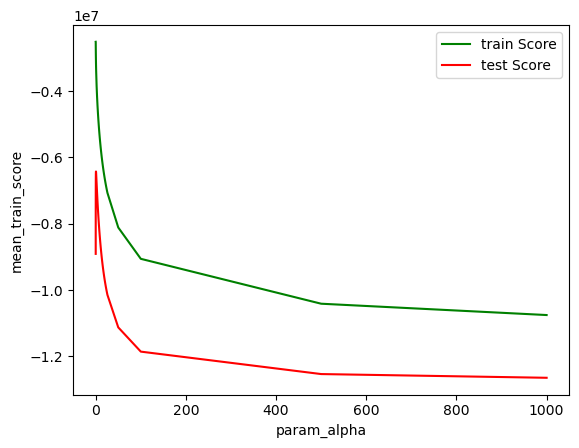

In [106]:
sns.lineplot(x='param_alpha',y='mean_train_score',data=cv_res_rg,label='train Score',color='green')
sns.lineplot(x='param_alpha',y='mean_test_score',data=cv_res_rg,label='test Score',color='red')

In [107]:
model_rg = Ridge(alpha=1.0)
model_rg.fit(xtr,ytr)
print('Train Score',model_rg.score(xtr,ytr))
print('Test Score',model_rg.score(xt,yt))
y_pred_rg= model_rg.predict(xt)

Train Score 0.9494289649602103
Test Score 0.825390795798615


## ElasticNET

In [108]:
params = {'alpha': [0.0001, 0.0002,0.0003,0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.01, 0.05,0.06,0.07,0.08,0.09, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,19,18, 17,16,15,14,13,12,11,20,21,22,23,24,26,25, 50, 100, 500, 1000 ],
          'l1_ratio':[0.1,0.2,0.22,0.23,0.24,0.3,0.4,0.5,0.6,0.70,0.80,0.81,0.82,83,0.84,0.85,0.9]}
gs2 = GridSearchCV(ElasticNet(),param_grid=params,cv=5,n_jobs=-1,scoring='neg_mean_squared_error',
                  return_train_score=True)
gs2.fit(xtr,ytr)
gs2.best_params_

{'alpha': 0.006, 'l1_ratio': 0.3}

In [109]:
cv_res_enet = pd.DataFrame(gs2.cv_results_)
cv_res_enet.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062496,0.017115,0.009373,0.007653,0.0001,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1}",-1.573155e+07,-5.994803e+06,-1.053902e+07,...,-8.387720e+06,4.258798e+06,250,-2.347490e+06,-2.492885e+06,-2.472539e+06,-2.822844e+06,-2.449724e+06,-2.517096e+06,160846.840425
1,0.062497,0.009881,0.009374,0.012499,0.0001,0.2,"{'alpha': 0.0001, 'l1_ratio': 0.2}",-1.590861e+07,-6.005825e+06,-1.057740e+07,...,-8.434879e+06,4.320733e+06,256,-2.346229e+06,-2.492046e+06,-2.471553e+06,-2.821960e+06,-2.448699e+06,-2.516097e+06,160942.589114
2,0.053120,0.007653,0.003125,0.006250,0.0001,0.22,"{'alpha': 0.0001, 'l1_ratio': 0.22}",-1.594502e+07,-6.008071e+06,-1.058517e+07,...,-8.444562e+06,4.333462e+06,257,-2.345986e+06,-2.491888e+06,-2.471366e+06,-2.821792e+06,-2.448502e+06,-2.515907e+06,160961.377210
3,0.046872,0.009882,0.003125,0.006250,0.0001,0.23,"{'alpha': 0.0001, 'l1_ratio': 0.23}",-1.596335e+07,-6.009200e+06,-1.058907e+07,...,-8.449436e+06,4.339871e+06,258,-2.345866e+06,-2.491809e+06,-2.471274e+06,-2.821709e+06,-2.448405e+06,-2.515813e+06,160970.718635
4,0.046872,0.000001,0.003125,0.006250,0.0001,0.24,"{'alpha': 0.0001, 'l1_ratio': 0.24}",-1.598176e+07,-6.010331e+06,-1.059298e+07,...,-8.454331e+06,4.346309e+06,259,-2.345747e+06,-2.491732e+06,-2.471182e+06,-2.821626e+06,-2.448308e+06,-2.515719e+06,160980.023364


<AxesSubplot:xlabel='param_alpha', ylabel='mean_train_score'>

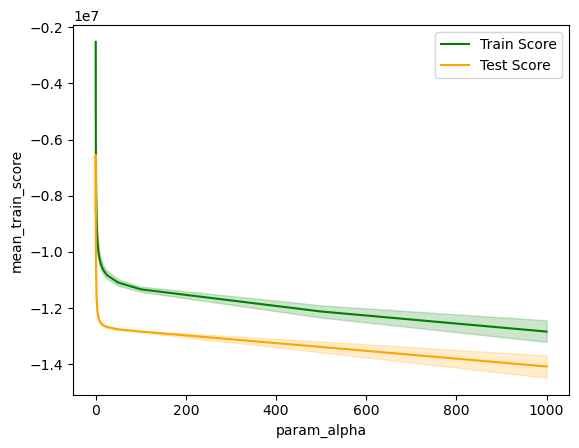

In [110]:
sns.lineplot(x='param_alpha',y='mean_train_score',data=cv_res_enet,label='Train Score',color='green')
sns.lineplot(x='param_alpha',y='mean_test_score',data=cv_res_enet,label='Test Score',color='orange')

<AxesSubplot:xlabel='param_l1_ratio', ylabel='mean_train_score'>

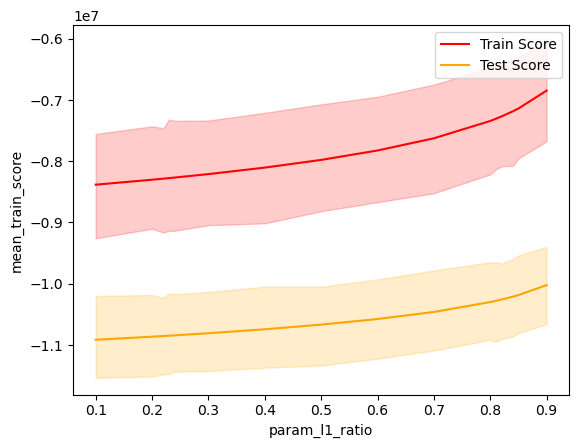

In [111]:
sns.lineplot(x='param_l1_ratio',y='mean_train_score',data=cv_res_enet,label='Train Score',color='red')
sns.lineplot(x='param_l1_ratio',y='mean_test_score',data=cv_res_enet,label='Test Score',color='orange')

In [112]:
gs2.best_params_

{'alpha': 0.006, 'l1_ratio': 0.3}

In [113]:
model_enet = ElasticNet(**gs2.best_params_)
model_enet.fit(xtr,ytr)
print('Train Score',model_enet.score(xtr,ytr))
print('Test Score',model_enet.score(xt,yt))
y_pred_enet = model_enet.predict(xt)

Train Score 0.9518258417536977
Test Score 0.8241699965033054


## Polynomial


In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [115]:
for i in range(1,5):
    pf= PolynomialFeatures(degree=i,include_bias=False)
    xtr_tr= pf.fit_transform(xtr)
    xt_tr = pf.transform(xt)
    modeli = LinearRegression()
    modeli.fit(xtr_tr,ytr)
    print(f'Train Score {modeli.score(xtr_tr,ytr)} \n test Score {modeli.score(xt_tr,yt)}')
    print(i,'th degree is used \n')

Train Score 0.9568571491556876 
 test Score 0.7869252385441483
1 th degree is used 

Train Score 0.9990677446534608 
 test Score -25.495319681364926
2 th degree is used 

Train Score 0.9991234875768801 
 test Score -794.2295785114534
3 th degree is used 

Train Score 0.9966329260004191 
 test Score -3142708430.5953474
4 th degree is used 



* Here in Polynomial Regression works the worst

In [116]:
model_lr = LinearRegression()
model_lr.fit(xtr,ytr)
print('Train Score',model_lr.score(xtr,ytr))
print('Test Score',model_lr.score(xt,yt))
y_pred_lr= model_lr.predict(xt)

Train Score 0.9568572710906573
Test Score 0.7869253644220774


In [117]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_lr,X,y,cv=10,scoring='r2')
print('scores',scores,'\nthe mean', scores.mean())

scores [-0.18556623 -2.65436627  0.80837684  0.90579533 -0.04441868  0.65946035
  0.61068578 -8.68281395 -2.90632692  0.64625132] 
the mean -1.084292243530245
